<a href="https://colab.research.google.com/github/mimaniharsh/Data-Visualization/blob/main/Harsh_Mimani___25A108___Assignment(stock_px).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

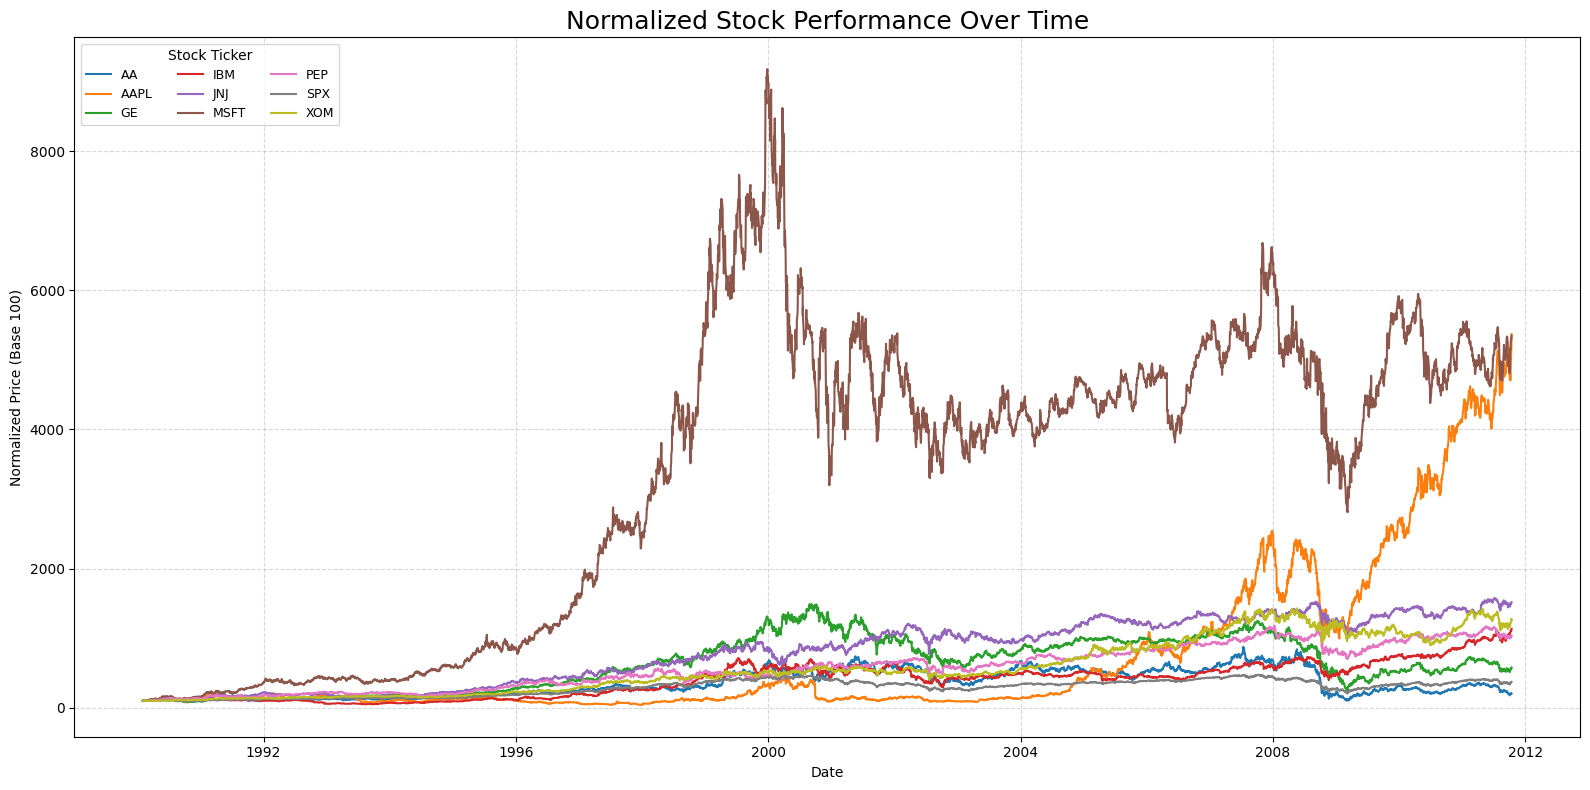

In [ ]:
# 1. Line Plot – Time Series of Stock Prices

# STEP 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2: Load the stock data
data = pd.read_csv('stock_px.csv', index_col=0, parse_dates=True)
data.index.name = 'Date'

# STEP 3: Automatically detect all stock columns
stock_columns = data.columns.tolist()

# OPTIONAL: simulate each stock price
normalized = True  # Set to False if you want raw prices

if normalized:
    stock_data = (data / data.iloc[0]) * 100  # Normalize to 100
    ylabel = 'Normalized Price (Base 100)'
    title = 'Normalized Stock Performance Over Time'
else:
    stock_data = data.copy()
    ylabel = 'Stock Price (USD)'
    title = 'Stock Prices Over Time'

# STEP 4: Plot the data
plt.figure(figsize=(16, 8))

for stock in stock_columns:
    plt.plot(stock_data.index, stock_data[stock], label=stock)

# STEP 5: Customize chart appearance
plt.title(title, fontsize=18)
plt.xlabel('Date')
plt.ylabel(ylabel)
plt.legend(title='Stock Ticker', loc='upper left', ncol=3, fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# STEP 6: Display the chart
plt.show()

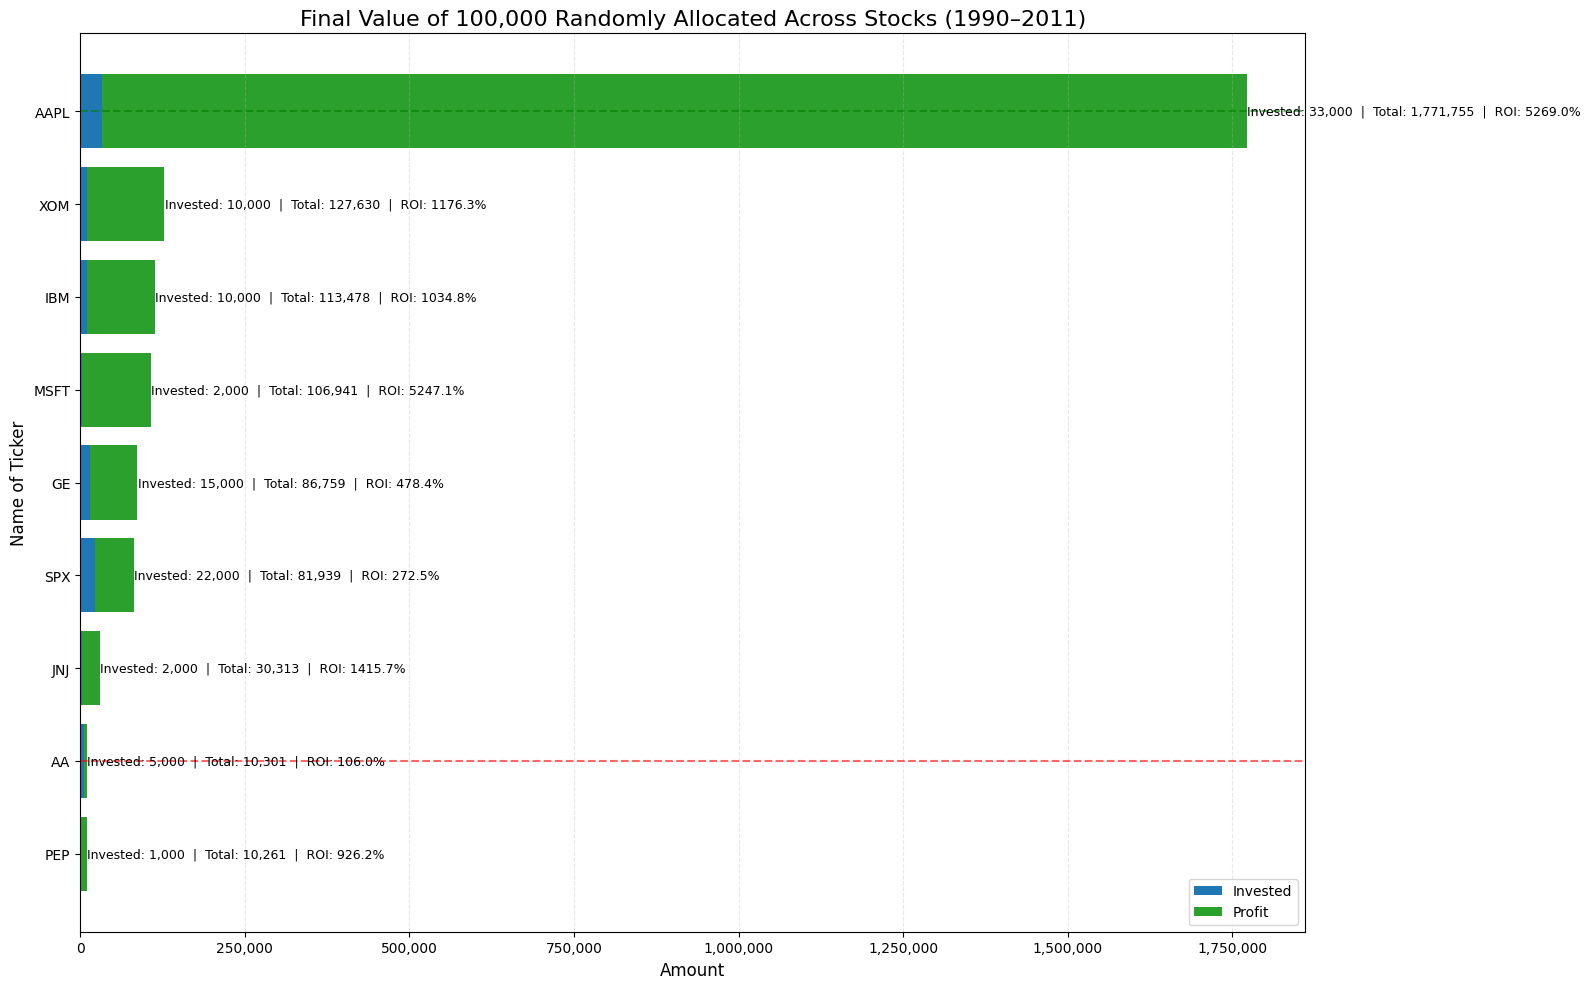

In [ ]:
## 2. Bar Chart – Cumulative Returns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load stock data
data = pd.read_csv('stock_px.csv', index_col=0, parse_dates=True)
data.index.name = 'Date'

# Calculate cumulative returns
cumulative_returns = (1 + data.pct_change(fill_method=None)).cumprod()

# Allocate 100,000 randomly across 9 stocks (rounded to nearest 1,000)
np.random.seed(42)
stocks = ['AA', 'AAPL', 'GE', 'IBM', 'JNJ', 'MSFT', 'PEP', 'SPX', 'XOM']
weights = np.random.dirichlet(np.ones(len(stocks)), size=1)[0]
allocations = np.round(weights * 100000 / 1000) * 1000
custom_investments = dict(zip(stocks, allocations.astype(int)))

# Calculate final values from investment
investment_df = pd.DataFrame({
    stock: cumulative_returns[stock] * amount
    for stock, amount in custom_investments.items()
})
final_values = investment_df.iloc[-1]

# Compute components
invested = pd.Series(custom_investments)
profit = final_values - invested
roi = (profit / invested * 100).round(1)

# Sort by total return
sorted_stocks = final_values.sort_values().index
invested_sorted = invested[sorted_stocks]
profit_sorted = profit[sorted_stocks]
roi_sorted = roi[sorted_stocks]
total_sorted = final_values[sorted_stocks]

# Identify best and worst performers
best = roi_sorted.idxmax()
worst = roi_sorted.idxmin()

# Plot the chart
plt.figure(figsize=(16, 10))
plt.barh(sorted_stocks, invested_sorted, color='#1f77b4', label='Invested')
plt.barh(sorted_stocks, profit_sorted, left=invested_sorted, color='#2ca02c', label='Profit')

# Annotate with formatted labels (Invested | Total | ROI)
for i, stock in enumerate(sorted_stocks):
    inv = invested_sorted[stock]
    prof = profit_sorted[stock]
    total = total_sorted[stock]
    roi_val = roi_sorted[stock]

    label_text = f'Invested: {int(inv):,}  |  Total: {int(total):,}  |  ROI: {roi_val}%'
    plt.text(inv + prof + 300, i, label_text, va='center', ha='left', fontsize=9, color='black')

# Highlight best and worst performers
plt.axhline(y=list(sorted_stocks).index(best), color='green', linewidth=1.5, linestyle='--', alpha=0.6)
plt.axhline(y=list(sorted_stocks).index(worst), color='red', linewidth=1.5, linestyle='--', alpha=0.6)

# Format x-axis with commas
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)

# Chart title and formatting
plt.title('Final Value of 100,000 Randomly Allocated Across Stocks (1990–2011)', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Name of Ticker', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()